## LDA - Linear Discriminant Analysis

### **What is LDA (Linear Discriminant Analysis)?**

**Linear Discriminant Analysis (LDA)** is a **supervised** dimensionality reduction technique.
It is used to project data onto a lower-dimensional space while **maximizing class separability**.

While **PCA** focuses on preserving **overall variance** in the data (without considering labels), **LDA** focuses on **maximizing the distance between classes** (using label information).

---

### **Goals of LDA:**

* Reduce dimensionality.
* Retain class-discriminatory information.
* Improve classification performance by transforming data into a better space.

---

### **How LDA Works (Step-by-Step):**

1. **Compute the mean of each class.**

2. **Compute the overall mean** of all data.

3. **Compute the Within-Class Scatter Matrix (SW):**

   * Measures how data points vary **within** each class.

4. **Compute the Between-Class Scatter Matrix (SB):**

   * Measures how class means differ from the overall mean.

5. **Compute the matrix:**

   * `S = SW⁻¹ * SB`

6. **Find eigenvectors and eigenvalues** of matrix `S`.

7. **Sort eigenvectors** by decreasing eigenvalues and select the top `k` components.

8. **Project data** onto the new lower-dimensional space formed by these `k` discriminant components.

---

### **Key Differences Between LDA and PCA:**

| Aspect               | PCA                       | LDA                                |
| -------------------- | ------------------------- | ---------------------------------- |
| Type                 | Unsupervised              | Supervised                         |
| Uses class labels    | No                        | Yes                                |
| Objective            | Maximize variance         | Maximize class separation          |
| Components available | At most equal to features | At most `n_classes - 1` components |
| Useful when          | Data is unlabeled         | Classification problem with labels |

---

### **When to Use LDA:**

* You are working on a **classification problem**.
* You want to **reduce dimensionality** while keeping class separability.
* You have **more features than samples** or highly correlated features.

---

### **Important Notes:**

* LDA assumes **normal distribution** of the features and **equal covariance** for all classes.
* It is **not ideal** when these assumptions are strongly violated.
* LDA can be used both for **dimensionality reduction** and as a **classifier** itself.

### Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [6]:
df = pd.read_csv('../../datasets/Wine.csv')
print(df.sample(5))

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
156    13.84        4.12  2.38          19.5         89           1.80   
6      14.39        1.87  2.45          14.6         96           2.50   
166    13.45        3.70  2.60          23.0        111           1.70   
122    12.42        4.43  2.73          26.5        102           2.20   
99     12.29        3.17  2.21          18.0         88           2.85   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
156        0.83                  0.48             1.56             9.01  0.57   
6          2.52                  0.30             1.98             5.25  1.02   
166        0.92                  0.43             1.46            10.68  0.85   
122        2.13                  0.43             1.71             2.08  0.92   
99         2.99                  0.45             2.81             2.30  1.42   

     OD280  Proline  Customer_Segment  
156   1.64      480         

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)
print('\n')
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train)
print('\n')
print(X_test)
print('\n')
print(y_train)
print('\n')
print(y_test)
print('\n')

[[1.434e+01 1.680e+00 2.700e+00 ... 5.700e-01 1.960e+00 6.600e+02]
 [1.253e+01 5.510e+00 2.640e+00 ... 8.200e-01 1.690e+00 5.150e+02]
 [1.237e+01 1.070e+00 2.100e+00 ... 1.040e+00 2.770e+00 6.600e+02]
 ...
 [1.438e+01 1.870e+00 2.380e+00 ... 1.200e+00 3.000e+00 1.547e+03]
 [1.269e+01 1.530e+00 2.260e+00 ... 9.600e-01 2.060e+00 4.950e+02]
 [1.234e+01 2.450e+00 2.460e+00 ... 8.000e-01 3.380e+00 4.380e+02]]


[[1.364000e+01 3.100000e+00 2.560000e+00 1.520000e+01 1.160000e+02
  2.700000e+00 3.030000e+00 1.700000e-01 1.660000e+00 5.100000e+00
  9.600000e-01 3.360000e+00 8.450000e+02]
 [1.421000e+01 4.040000e+00 2.440000e+00 1.890000e+01 1.110000e+02
  2.850000e+00 2.650000e+00 3.000000e-01 1.250000e+00 5.240000e+00
  8.700000e-01 3.330000e+00 1.080000e+03]
 [1.293000e+01 2.810000e+00 2.700000e+00 2.100000e+01 9.600000e+01
  1.540000e+00 5.000000e-01 5.300000e-01 7.500000e-01 4.600000e+00
  7.700000e-01 2.310000e+00 6.000000e+02]
 [1.373000e+01 1.500000e+00 2.700000e+00 2.250000e+01 1.010000

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

### Training the Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print("Precision (macro):", precision)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall (macro):", recall)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score (macro):", f1)

Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0


### Visualising the Training set results

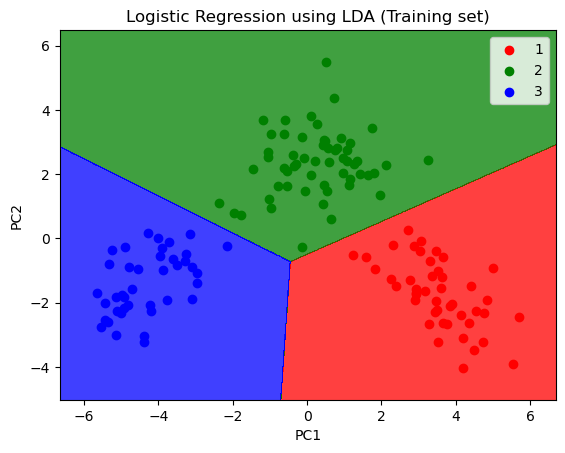

In [19]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green', 'blue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['red', 'green', 'blue'][i], label=j)

plt.title('Logistic Regression using LDA (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualising the Test set results

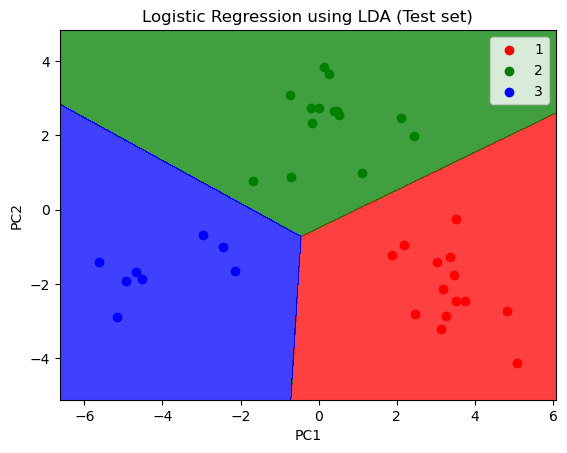

In [21]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green', 'blue']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['red', 'green', 'blue'][i], label=j)

plt.title('Logistic Regression using LDA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()